# Computation


Computation is the process of using a computer or other device to carry out a set of instructions or algorithms in order to solve a problem or perform a task. This can involve performing calculations, processing data, and making decisions based on the information that is provided. In simple terms, computation is the process that allows computers to do the things they do. Computation is based on the Turing machine. Turing machines are theoretical models of computers that are used to study the limitations of computation. Turing's thesis is a principle in computer science that states that any computation that can be performed by a human using a pen and paper can be performed by a machine. In this notebook we will discuss computation and it limatations when solving complex problems.

## Growth Rates
In discussing computation, we must have a clear picture of what we mean by complexity.
One of the most important distinctions is between polynomial growth and exponential growth.

### What is a polynomial?
A polynomial function is typically written as O(n^c), where c is the degree of the polynomial and n is the input size. This notation indicates that the running time or space usage of an algorithm grows polynomially with the input size.

For example, if an algorithm has a running time of O(n^3), this means that the running time increases at a rate of n^3 as the input size (n) increases. Similarly, if an algorithm has a running time of O(n^4), this means that the running time increases at a rate of n^4 as the input size increases.


### What is an exponential?
In exponential function, the big O notation is typically written as O(c^n), where c is a constant and n is the input size. This notation indicates that the running time or space usage of the algorithm grows exponentially with the input size. For example, if an algorithm has a running time of O(2^n), this means that the running time increases exponentially as the input size (n) increases.

###  Polynomial growth vs exponential growth
Exponential growth is "bigger" and "faster" than polynomial growth. This means that, no matter what the degree is on a given polynomial, a given exponential function will eventually be bigger than the polynomial.

Polynomial growth refers to a situation where a quantity increases by a fixed rate multiplied by itself over time. This results in a growth curve that looks like a smooth curve. Exponential growth, on the other hand, refers to a situation where a quantity increases at a rate that is proportional to its current value. This results in a growth curve that looks like an exponential curve and can quickly become very steep.



Here is a plot exploring polynomial growth vs exponential growth.


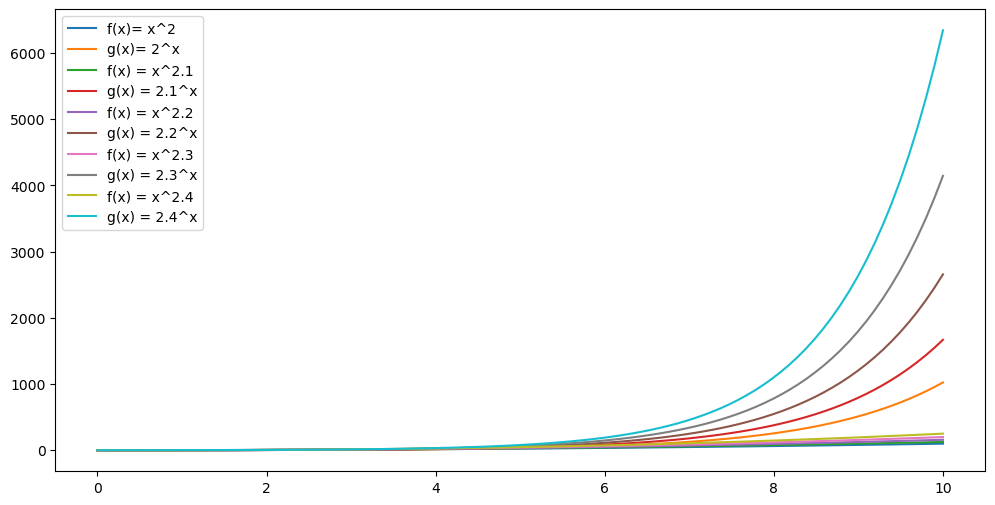

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)

fig,ax = plt.subplots(figsize=(12,6))

# Plot first pair of functions: f(x) = x ^ 2, g(x) = 2 ^ x
#g(x) grows at a faster rate than f(x) as x increases.
ax.plot(x,x**2,label='f(x)= x^2')
ax.plot(x,2**x,label='g(x)= 2^x')

# Plot second pair of functions: f(x) = x^2.1, g(x) = 2.1^x
#g(x) grows at a faster rate than f(x) as x increases.
ax.plot(x, x**2.1, label='f(x) = x^2.1')
ax.plot(x, 2.1**x, label='g(x) = 2.1^x')

# Plot third pair of functions: f(x) = 2.2^x, g(x) = 2.2^x
#g(x) grows at a faster rate than f(x) as x increases.
ax.plot(x, x**2.2, label='f(x) = x^2.2')
ax.plot(x, 2.2**x, label='g(x) = 2.2^x')


# Plot third pair of functions: f(x) = 2.3^x, g(x) = 2.3^x
#g(x) grows at a faster rate than f(x) as x increases.
ax.plot(x, x**2.3, label='f(x) = x^2.3')
ax.plot(x, 2.3**x, label='g(x) = 2.3^x')

# Plot third pair of functions: f(x) = 2.4^x, g(x) = 2.4^x
#g(x) grows at a faster rate than f(x) as x increases.
ax.plot(x, x**2.4, label='f(x) = x^2.4')
ax.plot(x, 2.4**x, label='g(x) = 2.4^x')

ax.legend()
plt.show()



## Big O Notation
Big O notation is a way of expressing the complexity of an algorithm. It is used to describe the time and/or space complexity of a program. It is used to describe the highest amount of resources (time, space, etc.) that the program will take to complete its task. It does not measure the exact amount of resources required, but instead gives an upper bound on the amount of resources that can be used.
We need to first understand what it means for a function to be O(g). In computer science, the "Big O" notation is used to describe the upper bound on the growth rate of a function. Informally, if a function f is O(g), it means that the function f grows no faster than the function g. In other words, the value of f(x) is bounded above by a constant multiple of g(x) for sufficiently large values of x.



Here is a summary of Big O complexity growth rates.

<img src="BigOSummarySheet.png" width = "800" height = "800"></img>






## Simulate a Turing machine using Python
The Turing machine was invented in 1936 by Alan Turing. A Turing machine is a mathematical model of computation describing an abstract machine. It manipulates symbols on a strip of tape according to a table of rules.The python algorithm below simulates the turning machine. 

A turing machine is a set of cells with an arrow pointing at one of them and that arrow can be in a given state.The programmer comes up with the rules for the arrow.The state table explains the set of rules that need to be followed. 

When a state points at a certain number or empty cell, a set of rules apply. The table has two states X and Y. The symbols that work on a turing machine are {1,0,_}. As a programmer,we create the rules for this table. An '_' means that the cell is empty or null.

The state at the top left of the rules is where you start. You look at what state you are in and what is the arrow pointing at and follow the set of rules on the right.

E.g. In state X the arrow is pointing on '1', overwrite with '1', move arrow to the right, and change state to Y.

There is no rule for state T and F. They are terminal states which means the program is finished. T means true and F means false. T means you accept the tape and F means you reject it.

If you start with 1 you end in false. If there is an even number of 1's its true, and if its an odd number of 1's then the result is false.
If you put all cells to blank it imediatly returns true.




In [3]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}



# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


In [20]:
#Change the above code to only accept inputs that do not contain any 1's.
#state table 
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['_', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['_', 'R', 'X'],
}


# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:])) 

X0101111
0X101111
0_Y01111
0_0Y1111
0_0_X111
0_0__Y11
0_0___X1
0_0____Y_
0_0_____F_


## Computation, complexity and Big O Notation
Computation as we know it today is limited. New ways of solving complex problems are being looked at. This is the subject of the 

## Double Split Experiment 
The double-slit experiment demonstrates the principles of quantum mechanics and challanges our perspective of reality. It demonstrates wave-particle duality of matter and energy and not just particles as was originally thought. It does not directly challenge Turing's thesis or the concept of Turing machines. When light is shone through the two slits, it creates an interference pattern on the screen, which is characteristic of waves. 
<img src="Doublesplit.png" width = "800" height = "800"></img>



## Summary

In this Jupyter notebook we have discussed the principles and models behind computation. If we are to solve complex problems we need to think in a differnt way that we think about computing today which is based around the Turing machine. 

## References 
Know thy complexities! (no date) Big. Available at: https://www.bigocheatsheet.com/ (Accessed: December 21, 2022). 
Big-O notation in 5 minutes (2017) YouTube. YouTube. Available at: https://www.youtube.com/watch?v=__vX2sjlpXU (Accessed: December 21, 2022). 
The Double-Slit Experiment (2017) YouTube. YouTube. Available at: https://www.youtube.com/watch?v=uva6gBEpfDY (Accessed: December 21, 2022). 
Double-slit experiment (2022) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Double-slit_experiment (Accessed: December 21, 2022). 